In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import norm

%matplotlib inline
sns.set(color_codes=True)

# Data Description

In [2]:
Products_data=pd.read_csv('../DataSets/ProductsData.csv')
Products_data.index=range(1,len(Products_data)+1)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
4,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
5,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [3]:
Products_data.shape

(4350, 7)

In [4]:
Products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 1 to 4350
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [5]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39235089""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


# Data Cleaning

**Removing all the double quotes from each element in the features**

In [6]:
for i,col in enumerate(Products_data.columns):
    Products_data.iloc[:,i]=Products_data.iloc[:,i].str.replace('"','')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all empty string values with NaN**

In [7]:
Products_data=Products_data.replace(r'^\s*$',np.NaN,regex=True)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all the unwanted strings with NaN**

In [8]:
Products_data['Product_name'] = Products_data['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Removing all the unwanted space in price column**

In [9]:
Products_data['price'] = Products_data['price'].str.replace(' ', '')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [10]:
print(Products_data.isnull().sum())

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64


**The Price column having missing values can be used as test set, which will we evaluated by the model.**
**The rows with product name as missing values need to be removed, as they will not be useful in evaluation, as they are meaningless.**

In [11]:
i=Products_data['Product_name'].isnull()
data=Products_data[i]
data.shape

(380, 7)

In [12]:
Products_data=Products_data.drop(data.index,axis=0)
Products_data.shape

(3970, 7)

### Separating Test Data from the original Product Dataset

In [13]:
test_data=Products_data[Products_data.isnull().any(axis=1)]
test_data.shape

(1076, 7)

In [14]:
test_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
7,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
10,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca


In [15]:
test_data.index=range(1,len(test_data)+1)
test_data=test_data.drop('price',axis=1)
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat
4,becane,40008811,Motos,private,Fès-Boulemane,Fès
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca


In [16]:
data=test_data.drop_duplicates(subset=None,keep='first',inplace=False)
print('Shape of Original dataset:',test_data.shape)
print('Shape of dataset after dropping duplicates:',data.shape)

Shape of Original dataset: (1076, 6)
Shape of dataset after dropping duplicates: (923, 6)


#### Since, Rows in the test dataset after dropping duplicates is less than the original test dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [17]:
test_data=data
test_data.shape

(923, 6)

### Dropping the rows with missing values in target variable

In [18]:
Products_data.dropna(axis=0, subset=['price'], inplace=True)

In [19]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2894,2894,2894,2894,2894,2894,2894
unique,2331,2501,42,507,2,16,98
top,Renault,39241945,Voitures,300,private,Grand Casablanca,Casablanca
freq,16,3,448,98,1827,915,849


In [20]:
print(Products_data.isnull().sum())

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64


In [21]:
Products_data.shape

(2894, 7)

In [22]:
Products_data.index=range(1,len(Products_data)+1)

In [23]:
without_duplicate_data=Products_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',Products_data.shape)
print('Shape of dataset after dropping duplicates:',without_duplicate_data.shape)

Shape of Original dataset: (2894, 7)
Shape of dataset after dropping duplicates: (2501, 7)


#### Since, Rows in the Product dataset after dropping duplicates is less than the original Product dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [24]:
Products_data=without_duplicate_data
Products_data.shape

(2501, 7)

In [25]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2501,2501,2501,2501,2501,2501,2501
unique,2331,2501,42,507,2,16,98
top,Renault,40008817,Voitures,300,private,Grand Casablanca,Casablanca
freq,13,1,378,91,1558,793,739


# Data Visualisation

In [26]:
Products_data['price']=pd.to_numeric(Products_data['price'], errors='coerce')
Products_data['Product_id']=pd.to_numeric(Products_data['Product_id'], errors='coerce')

In [27]:
Products_data=Products_data.sort_values('price')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Use

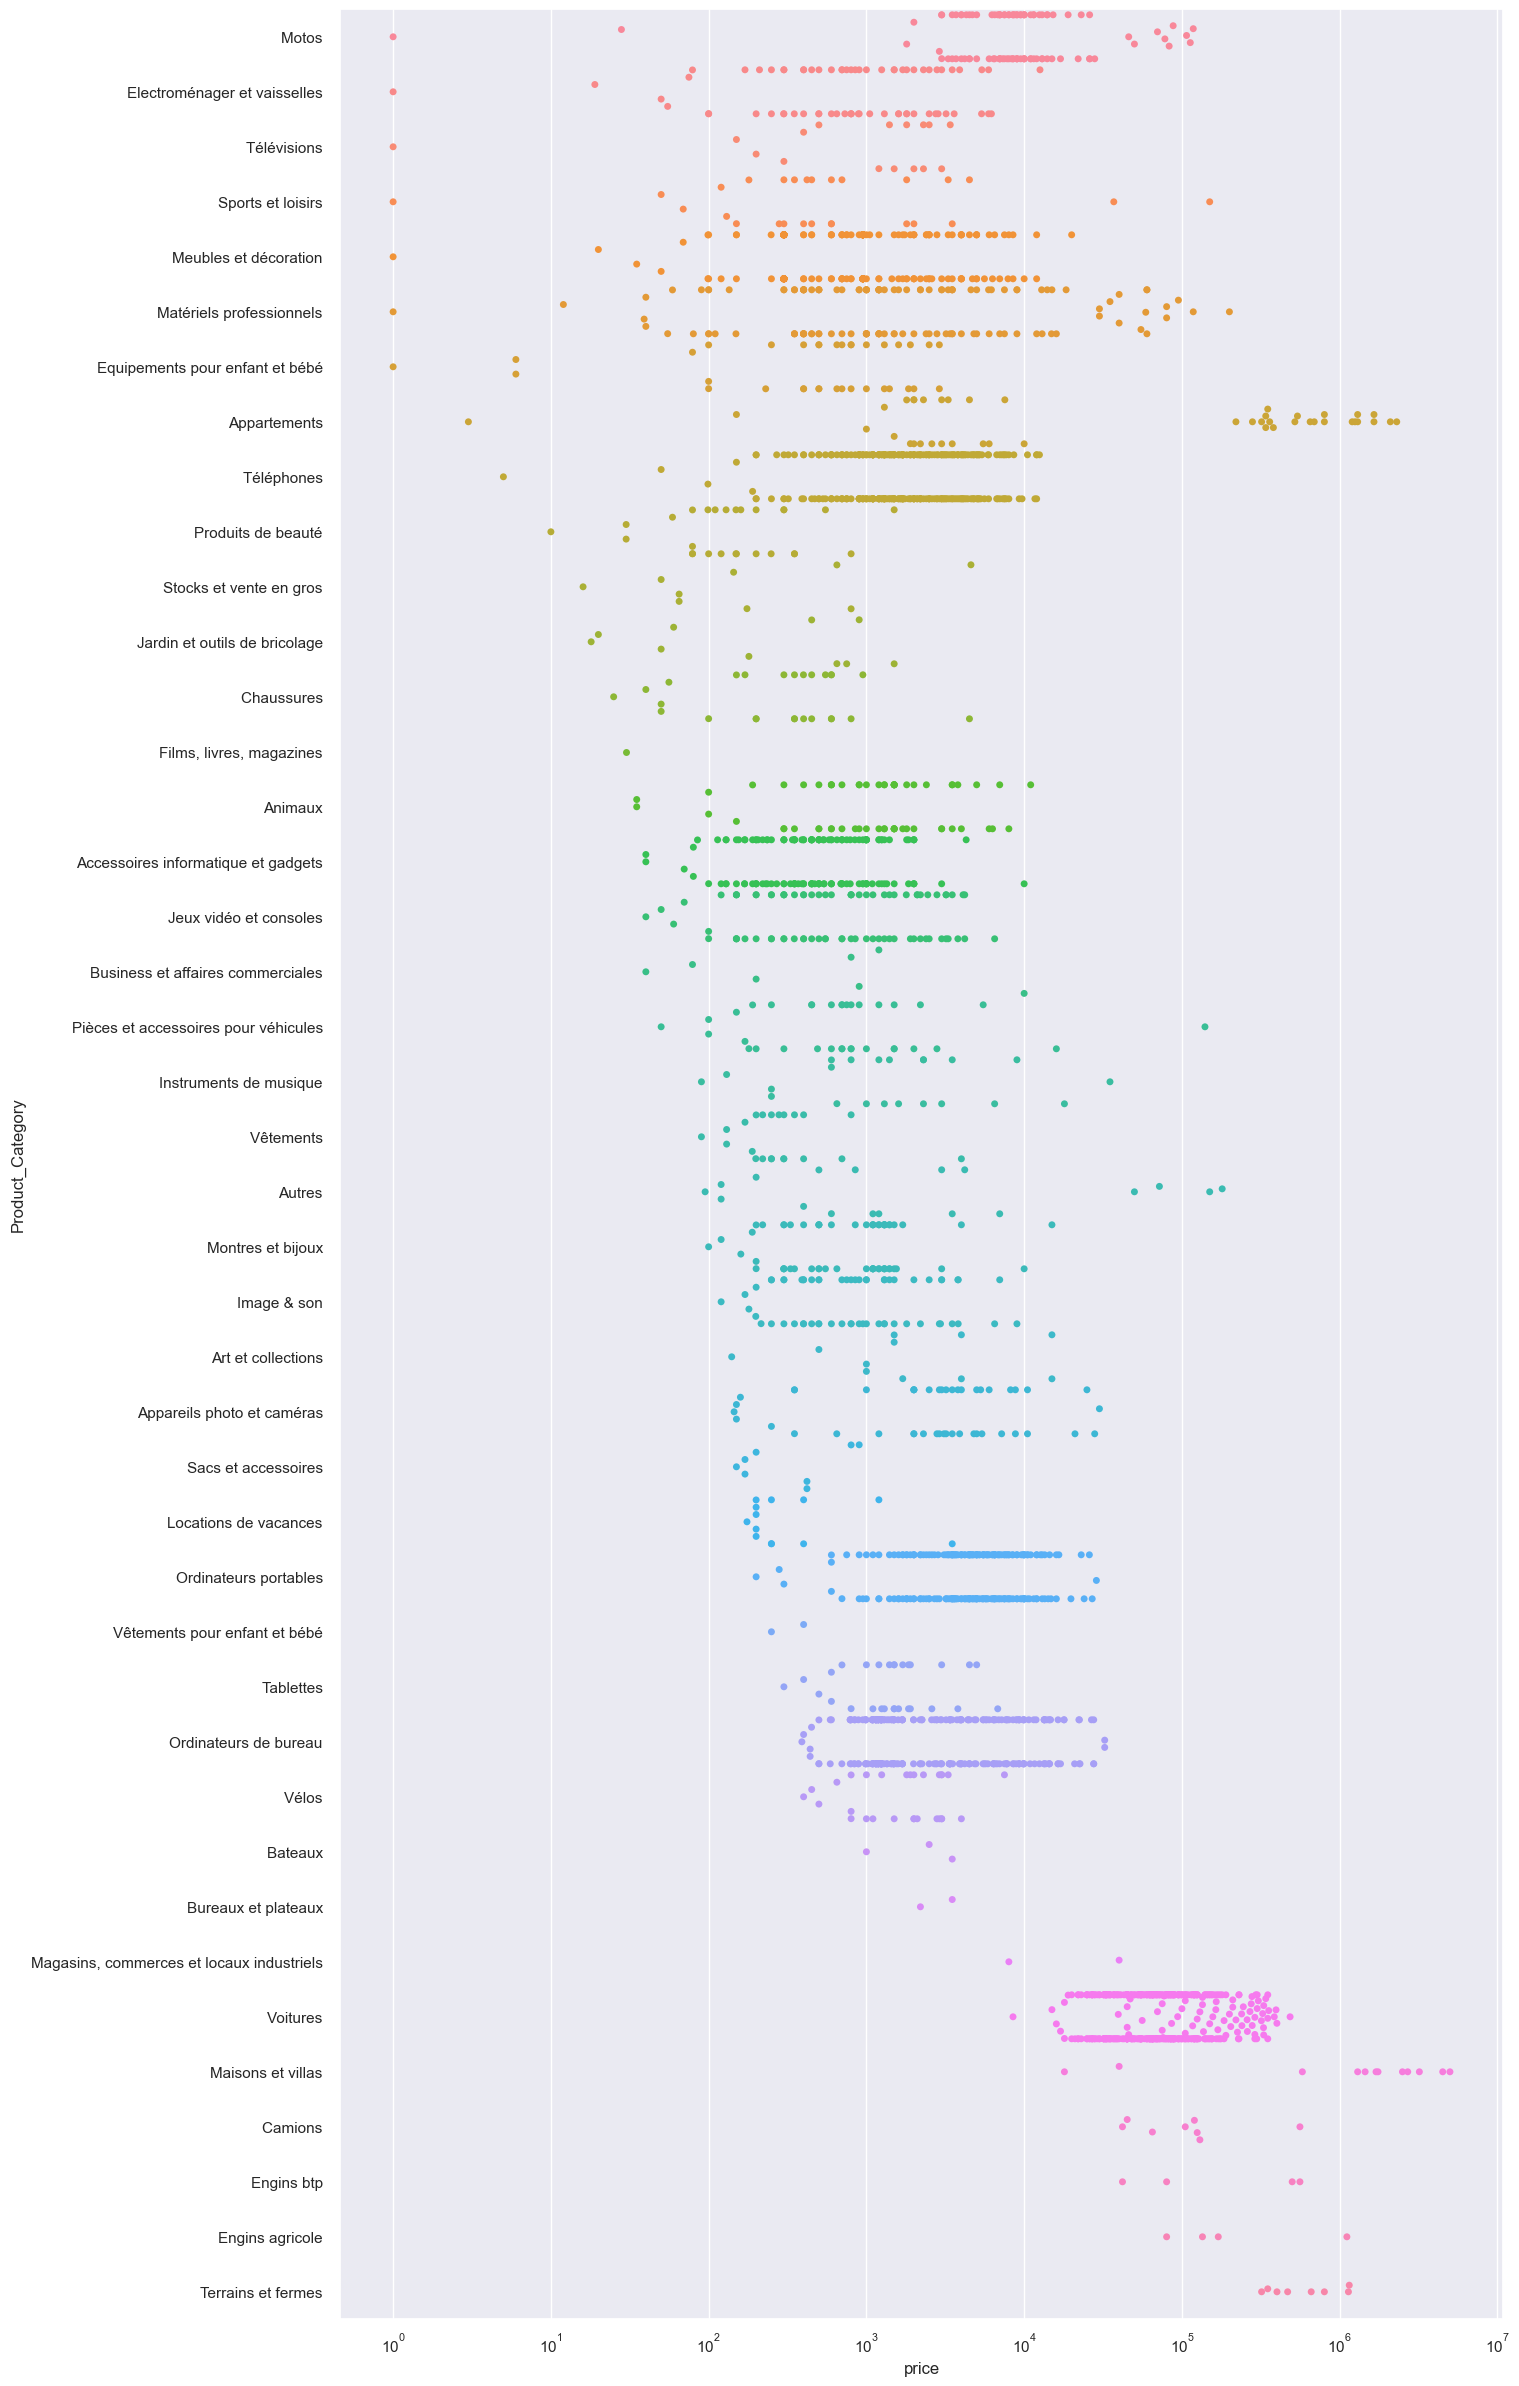

In [28]:
plt.figure(figsize=(15,30))
sns.swarmplot(Products_data['price'],Products_data['Product_Category'])
plt.xscale('log')

**Appartements** and **Maisons et villas** are the most expensive products category. **Voitures** product category seems to have the most number of expensive items. Many of the product category contains **outliers** due to variation in prices of the different product category.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


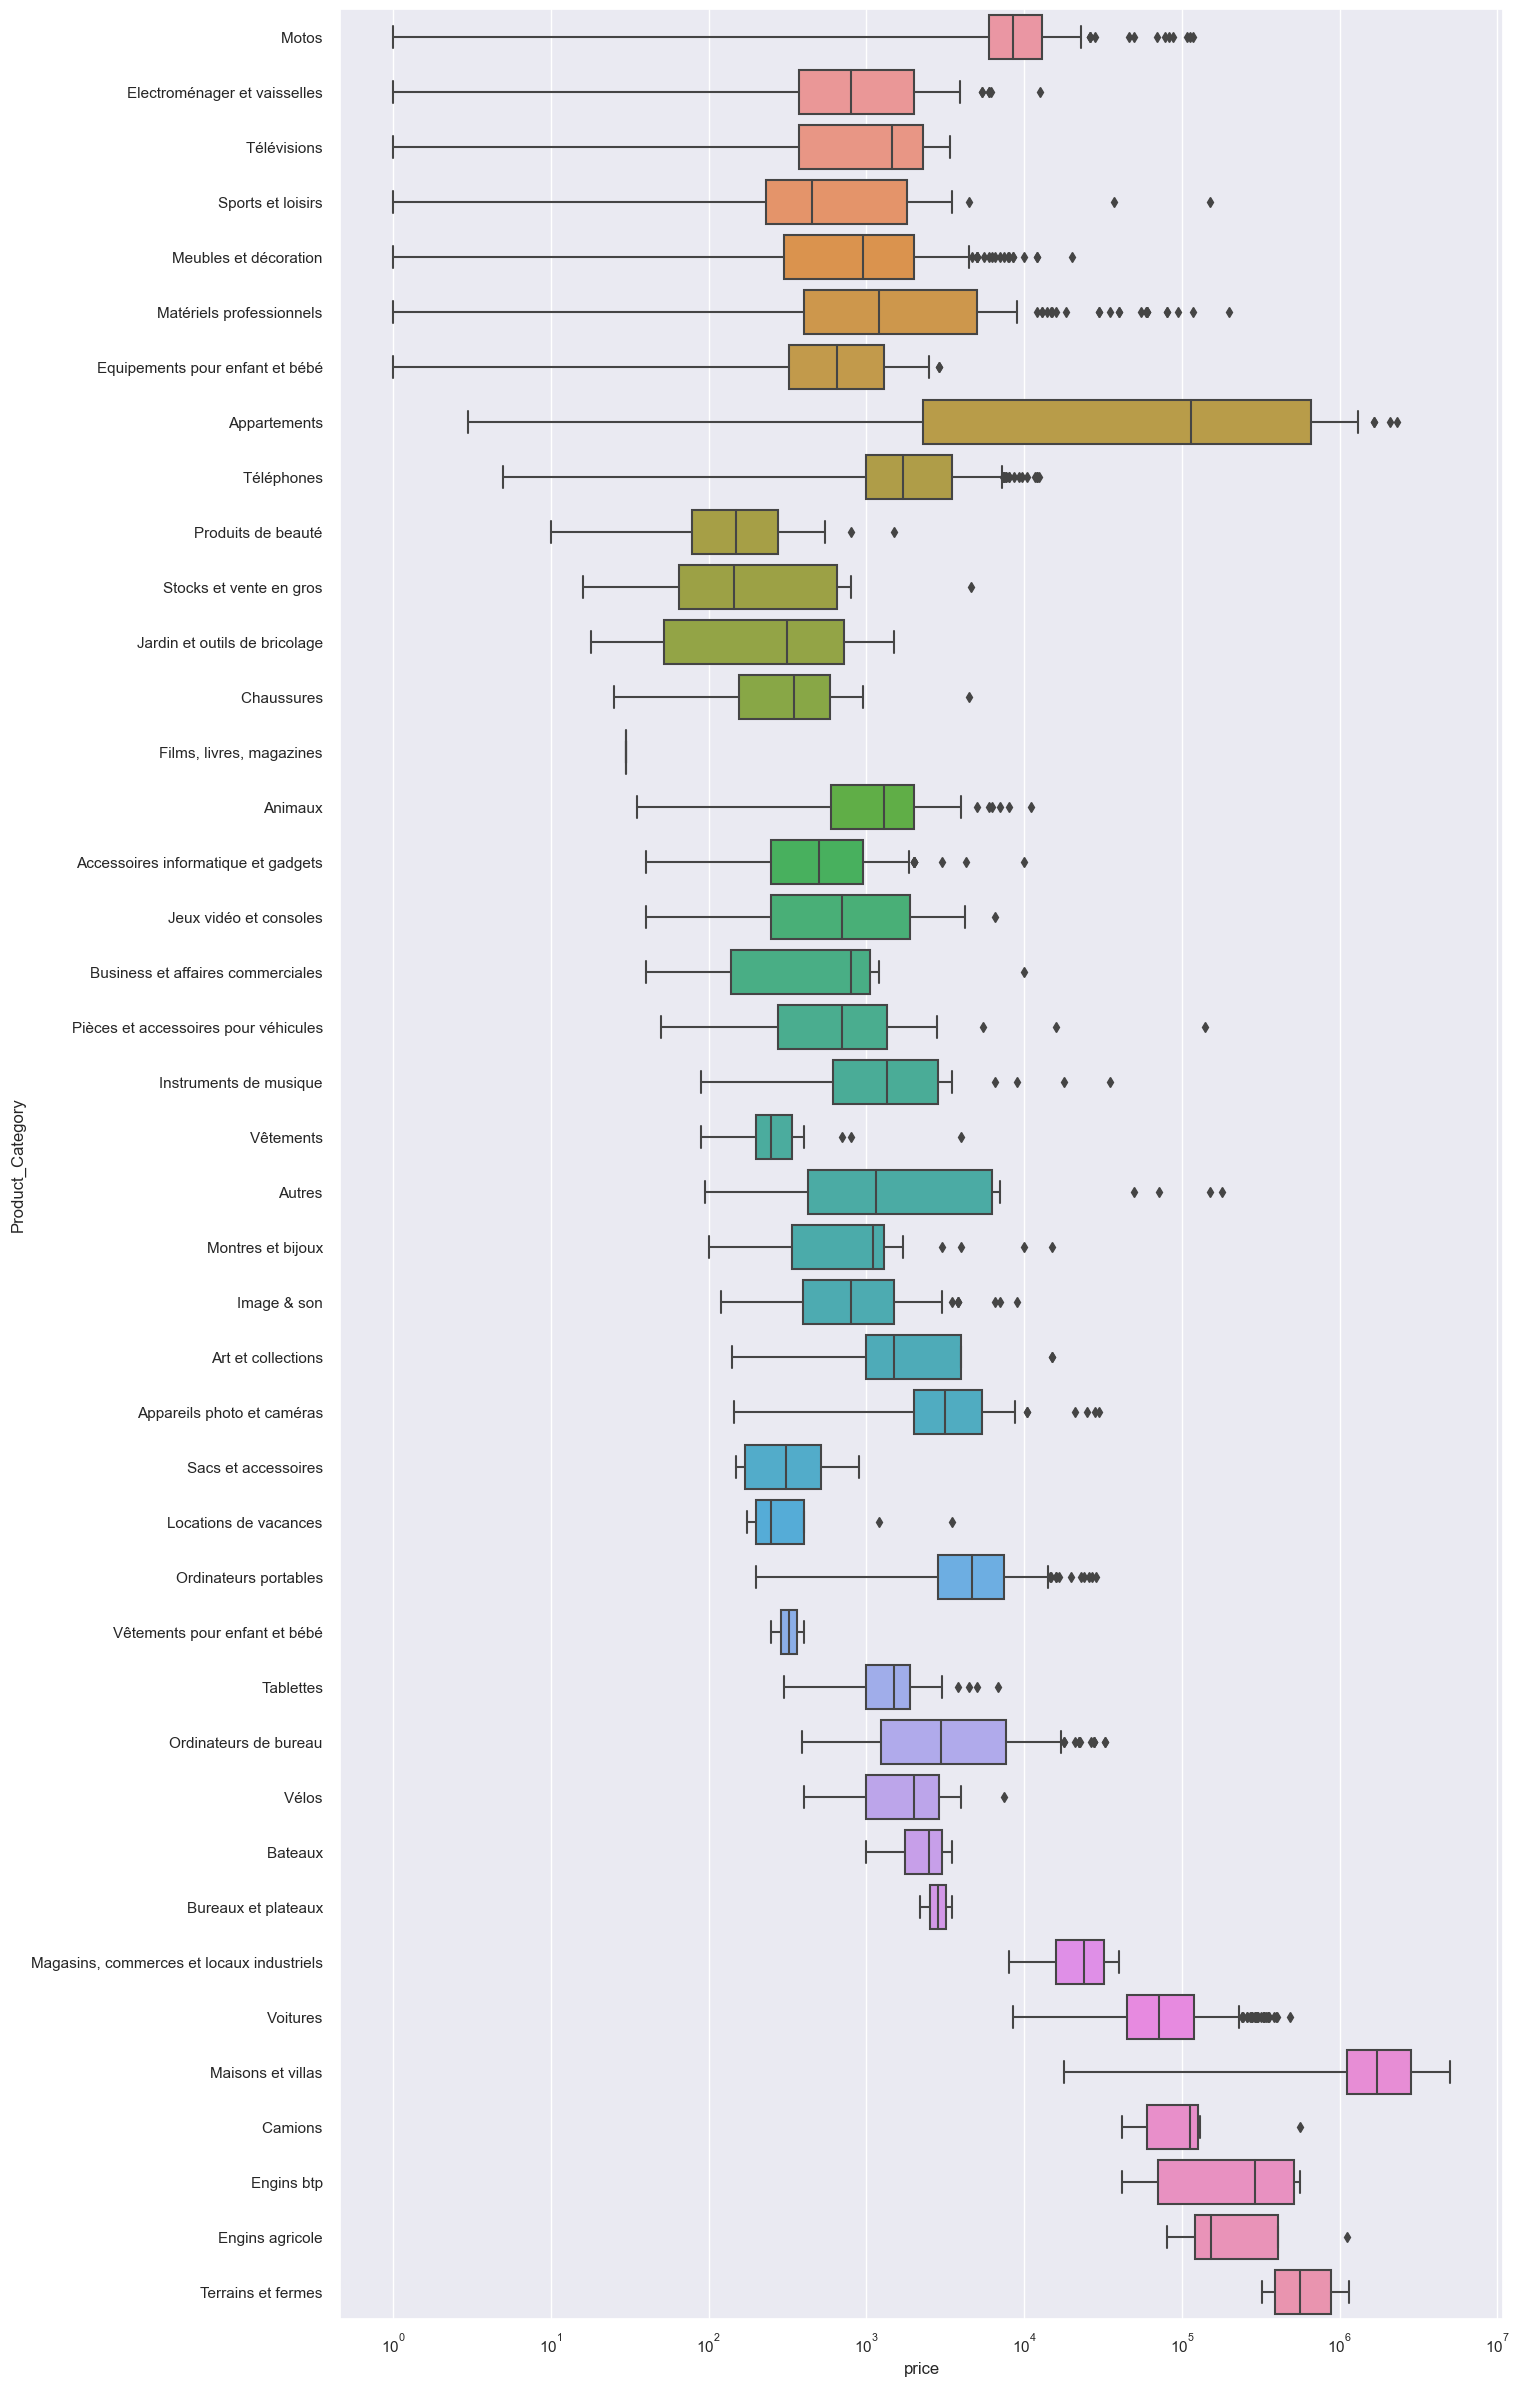

In [29]:
plt.figure(figsize=(15,30))
sns.boxplot(Products_data['price'],Products_data['Product_Category'])
plt.xscale('log')

Most of the products contain **outliers** because of more variation in cost price demand of the products.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


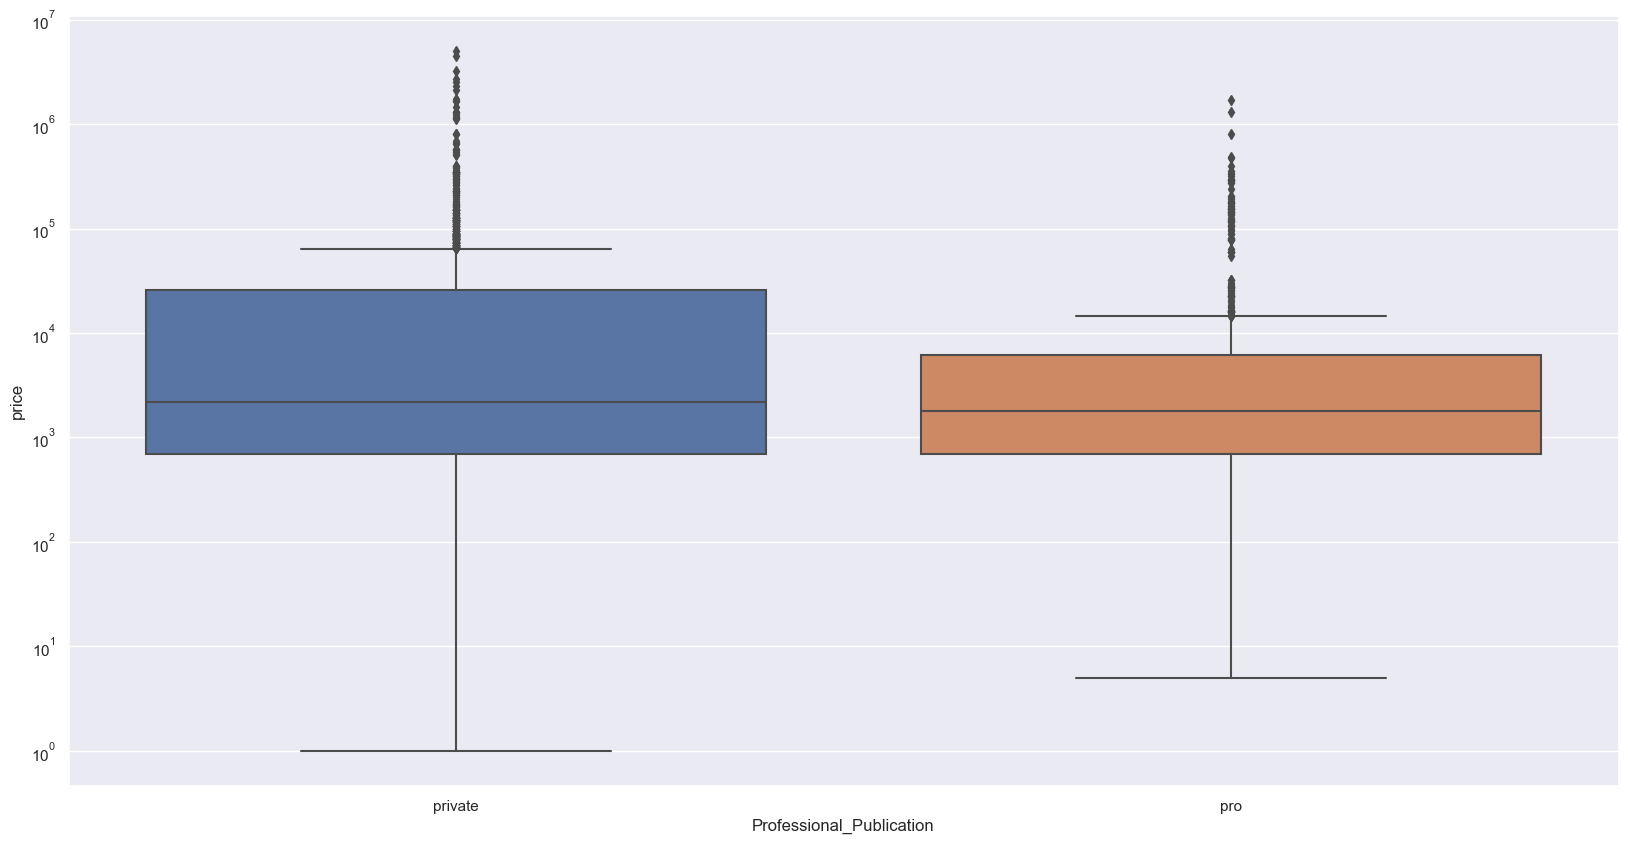

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(Products_data['Professional_Publication'],Products_data['price'])
plt.yscale('log')

The **private publications** seems to have more data items towards the more expensive prices products and even have more products towards the more cheap prices products than that of **pro publications** and also contains more number of **outliers** than that of **pro publications** product.

In [31]:
Products_data['Professional_Publication'].value_counts()

private    1558
pro         943
Name: Professional_Publication, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Professional_Publication', ylabel='count'>

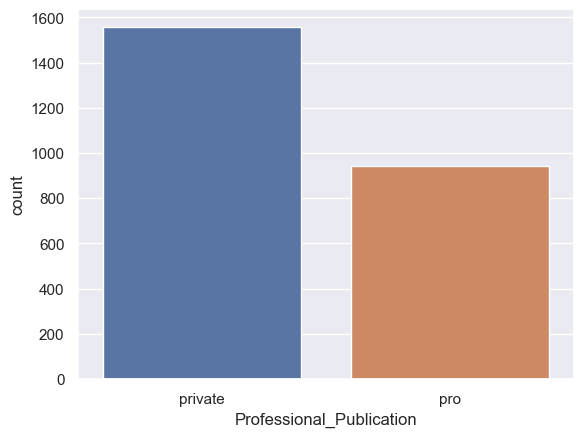

In [32]:
sns.countplot(Products_data['Professional_Publication'])

More number of **private publication** products are sold than **pro publication** products.

In [33]:
Products_data['Product_Category'].value_counts()

Voitures                                      378
Téléphones                                    290
Ordinateurs de bureau                         249
Ordinateurs portables                         216
Meubles et décoration                         190
Accessoires informatique et gadgets           139
Matériels professionnels                      129
Motos                                          97
Jeux vidéo et consoles                         81
Electroménager et vaisselles                   71
Animaux                                        61
Image & son                                    61
Montres et bijoux                              59
Appareils photo et caméras                     46
Appartements                                   44
Equipements pour enfant et bébé                35
Pièces et accessoires pour véhicules           35
Tablettes                                      29
Vélos                                          29
Produits de beauté                             27


<AxesSubplot:xlabel='count', ylabel='Product_Category'>

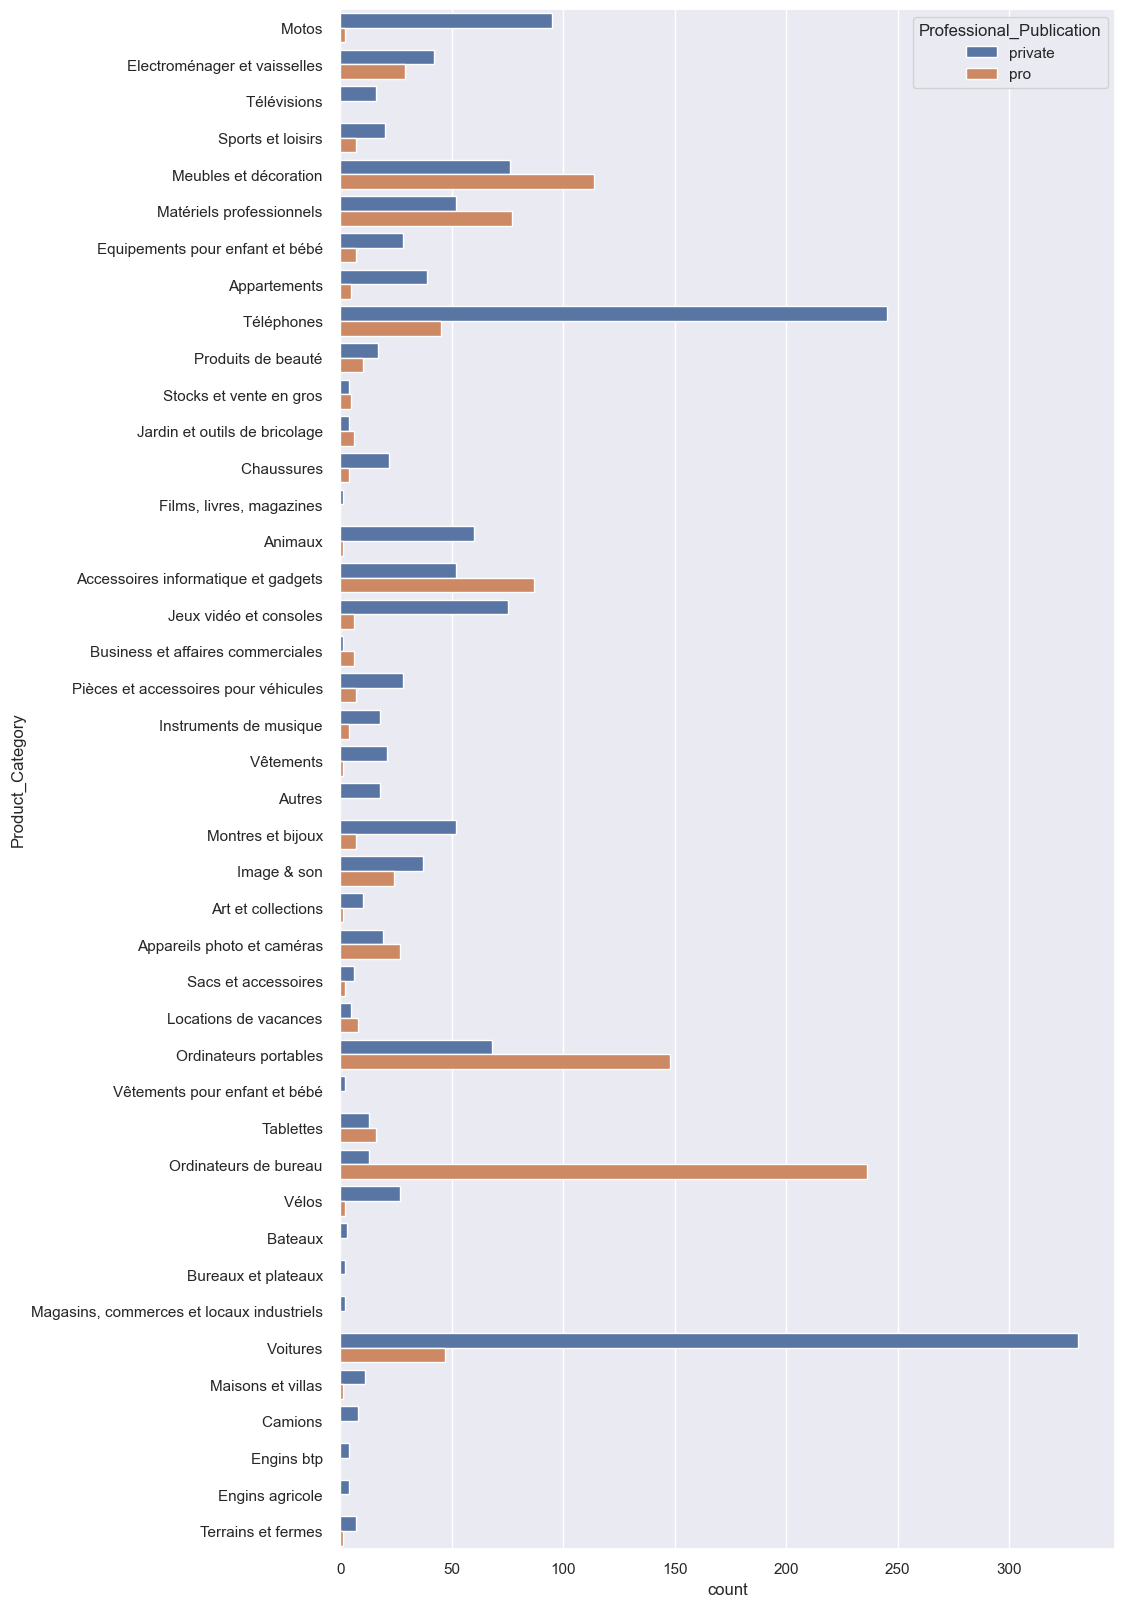

In [34]:
plt.figure(figsize=(10,20))
sns.countplot(y=Products_data['Product_Category'],hue=Products_data['Professional_Publication'])

**Voitures** category of product of **private publications** are more sold and **Ordinateurs de bureau** category of **pro publication** products are more sold. Overall, **Voitures** category products are sold the most. **Films, livres, magazines** category of products are sold the least.

In [35]:
Products_data['Region_address'].value_counts()

Grand Casablanca                    793
Rabat-Salé-Zemmour-Zaër             394
Tanger-Tétouan                      315
Marrakech-Tensift-Al Haouz          220
Souss-Massa-Drâa                    160
Fès-Boulemane                       153
Meknès-Tafilalet                    122
Oriental                             87
Gharb-Chrarda-Beni Hssen             85
Doukkala–Abda                        67
Chaouia-Ouardigha                    40
Tadla-Azilal                         25
Taza-Al Hoceima-Taounate             22
Guelmim-Es Semara                     8
Oued Ed-Dahab-Lagouira                6
Laâyoune-Boujdour-Sakia El Hamra      4
Name: Region_address, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Region_address'>

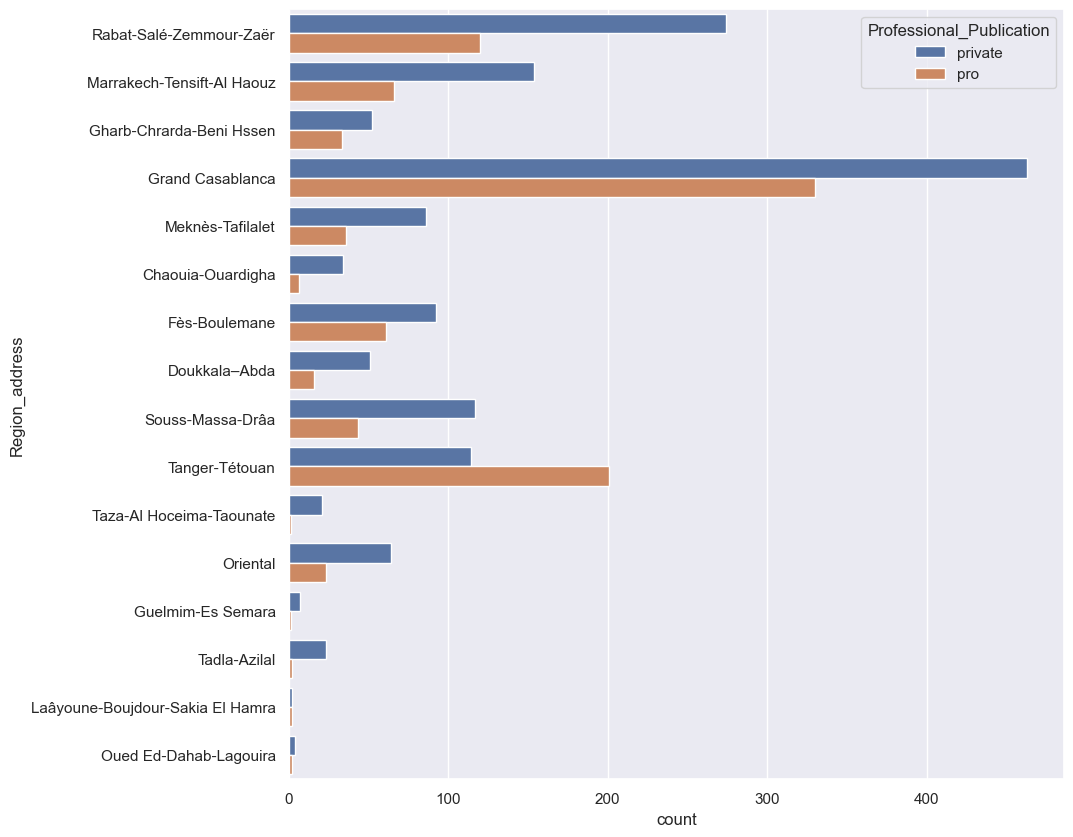

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(y=Products_data['Region_address'],hue=Products_data['Professional_Publication'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

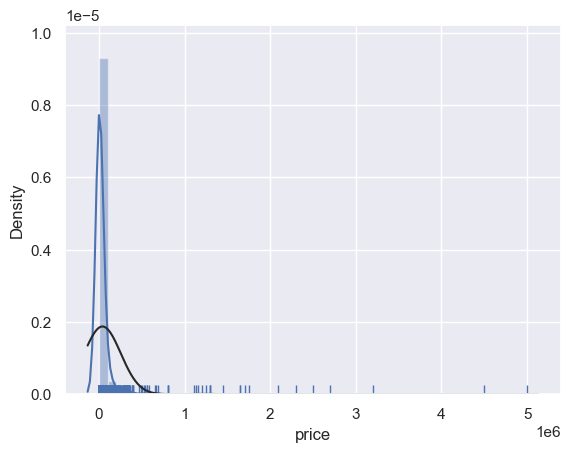

In [37]:
sns.distplot(Products_data['price'],kde=True,fit=norm,rug=True)

In [38]:
print('Minimum Price:',Products_data.price.min())
print('Maximum Price:',Products_data.price.max())

Minimum Price: 1
Maximum Price: 5000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

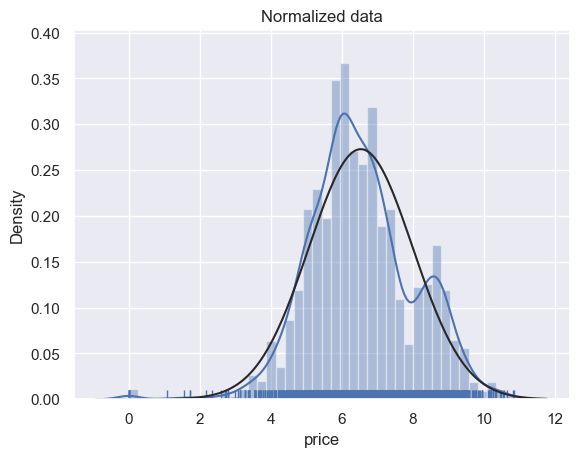

In [39]:
i=Products_data.price>0
Original=Products_data.price.loc[i]
Normalized=pd.Series(stats.boxcox(Original)[0],name='price',index=Original.index)

sns.distplot(Normalized,rug=True,fit=norm)
plt.title('Normalized data')

The dataset of prices are a little bit of **right skewed normalised**.

In [40]:
Private_price=Products_data.loc[Products_data['Professional_Publication']=='private','price']
Pro_price=Products_data.loc[Products_data['Professional_Publication']=='pro','price']
print('The average Products price of Private publication is {}'.format(round(Private_price.mean(), 2)))
print('The average Products price of Pro publication is {}'.format(round(Pro_price.mean(), 2)))

The average Products price of Private publication is 52573.44
The average Products price of Pro publication is 18231.1


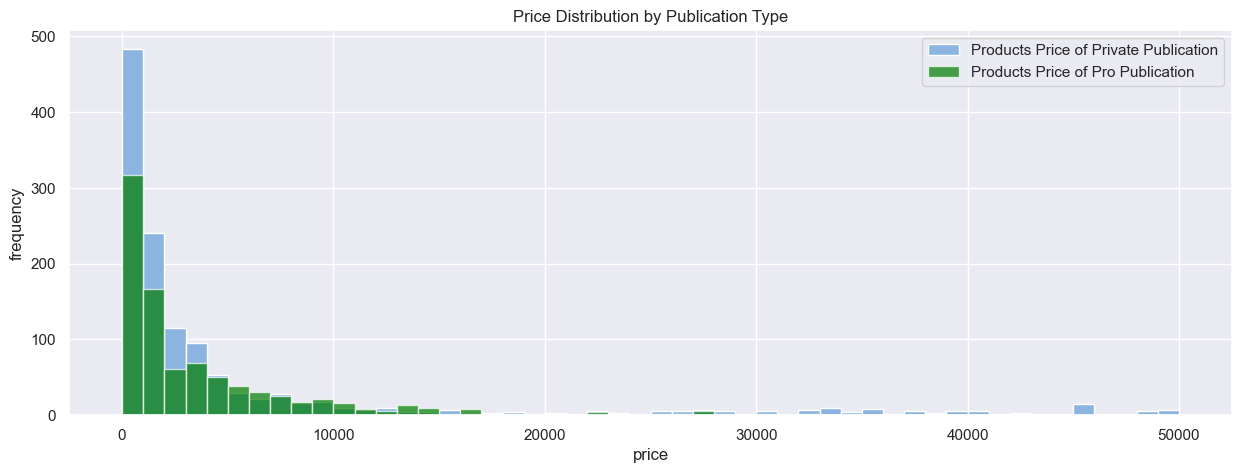

In [41]:
fig,ax=plt.subplots(figsize=(15,5))
ax.hist(Private_price,color='#8CB4E1',alpha=1.0,bins=50,range=[0,50000],label='Products Price of Private Publication')
ax.hist(Pro_price,color='#007D00',alpha=0.7,bins=50,range=[0,50000],label='Products Price of Pro Publication')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution by Publication Type')
plt.legend()

In [42]:
print('Maximum Price of Private Publication:',max(Private_price))
print('Minimum Price of Private Publication:',min(Private_price))
print('Maximum Price of Pro Publication:',max(Pro_price))
print('Minimum Price of Pro Publication:',min(Pro_price))

Maximum Price of Private Publication: 5000000
Minimum Price of Private Publication: 1
Maximum Price of Pro Publication: 1700000
Minimum Price of Pro Publication: 5


Text(0, 0.5, 'Price')

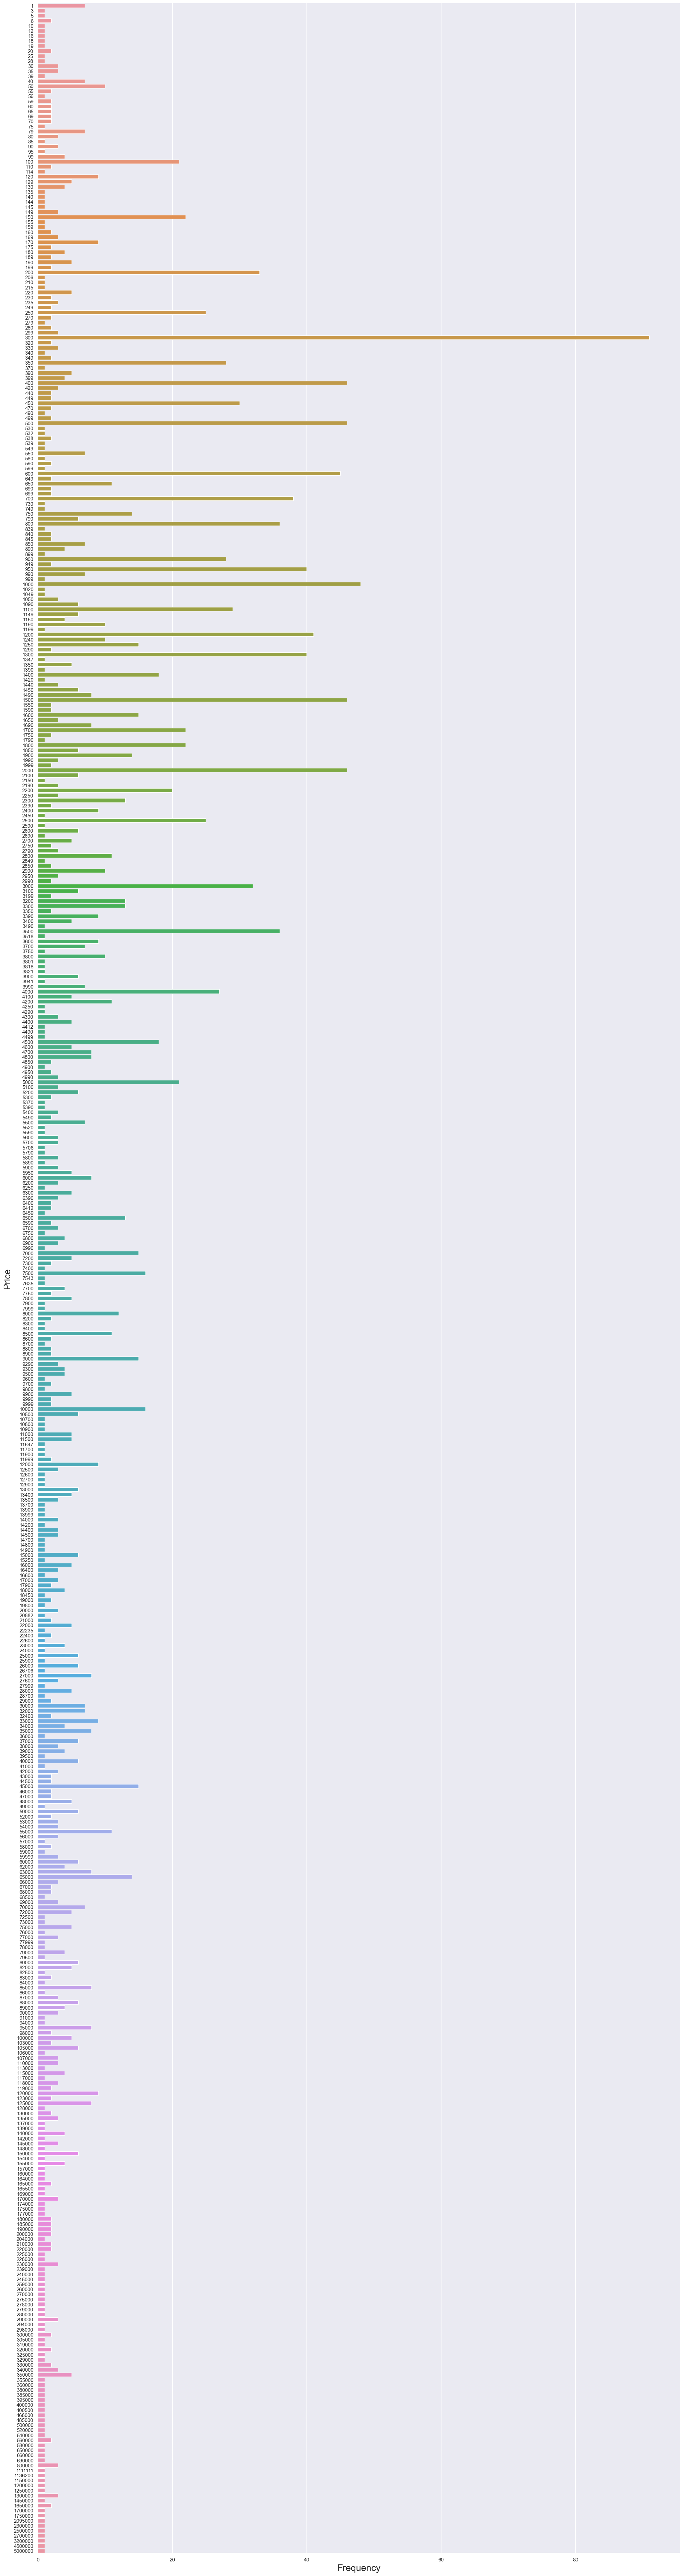

In [43]:
plt.figure(figsize=(25,100))
sns.countplot(y=Products_data['price'])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Price',fontsize=20)

High demand of product having cost price=300 and most of the products sold are of prices in the range 100 to 10000. Less demand of products with high price.

<AxesSubplot:xlabel='count', ylabel='Local_address'>

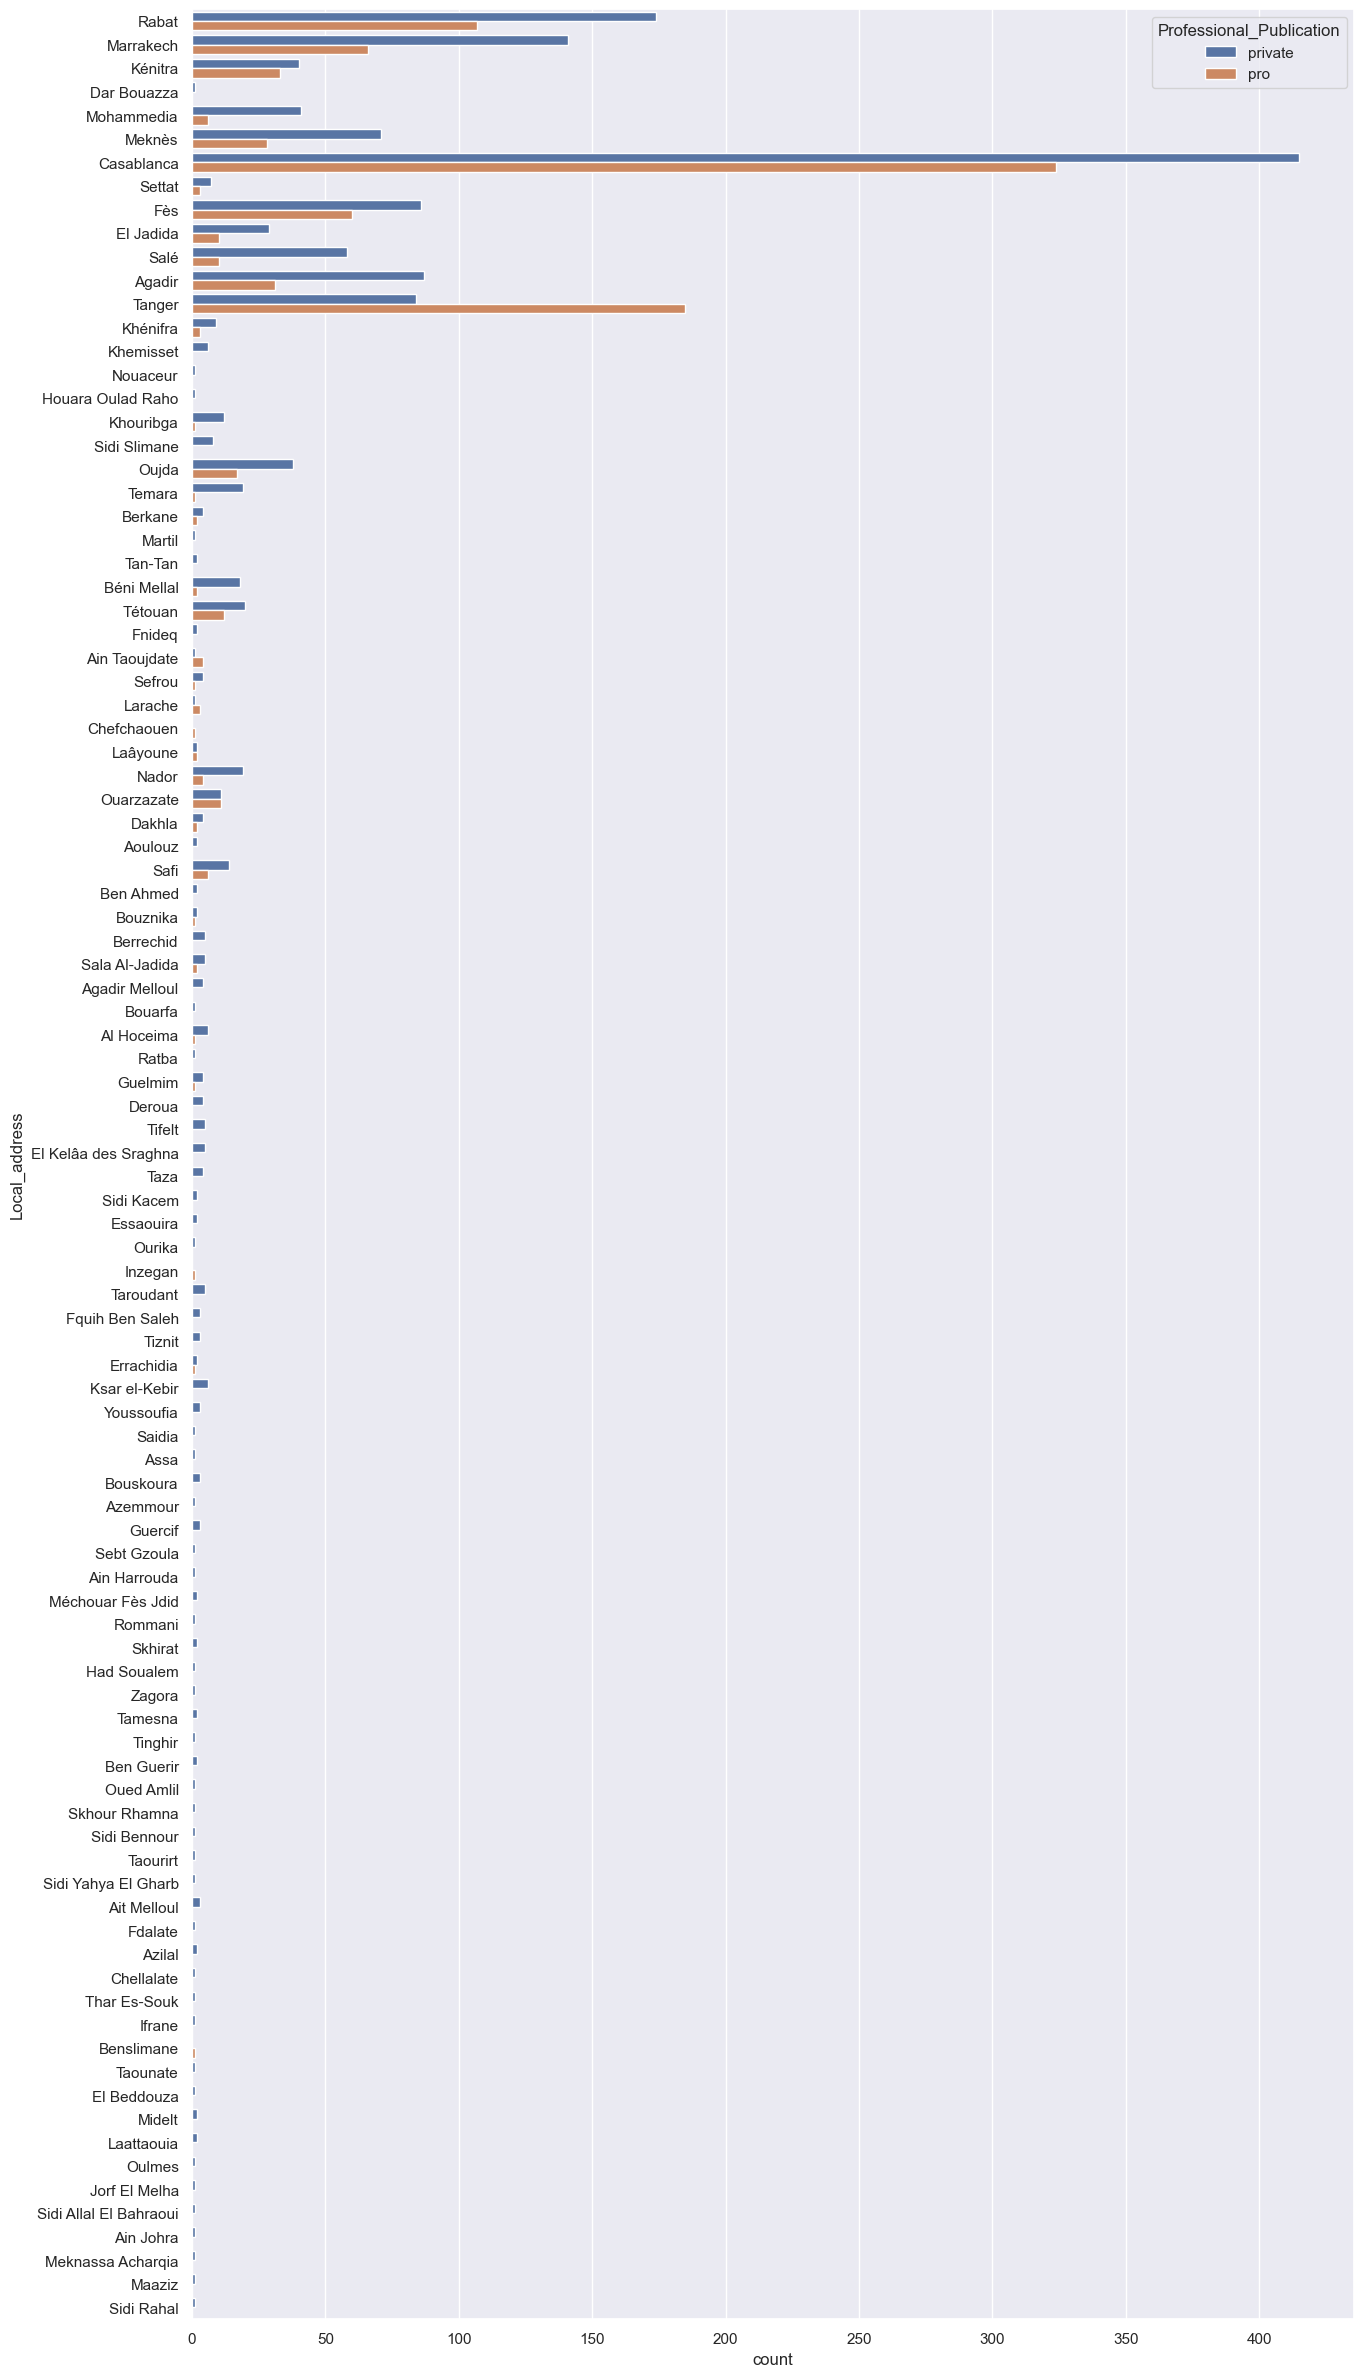

In [44]:
plt.figure(figsize=(15,30))
sns.countplot(y=Products_data['Local_address'],hue=Products_data['Professional_Publication'])

<AxesSubplot:xlabel='price', ylabel='Region_address'>

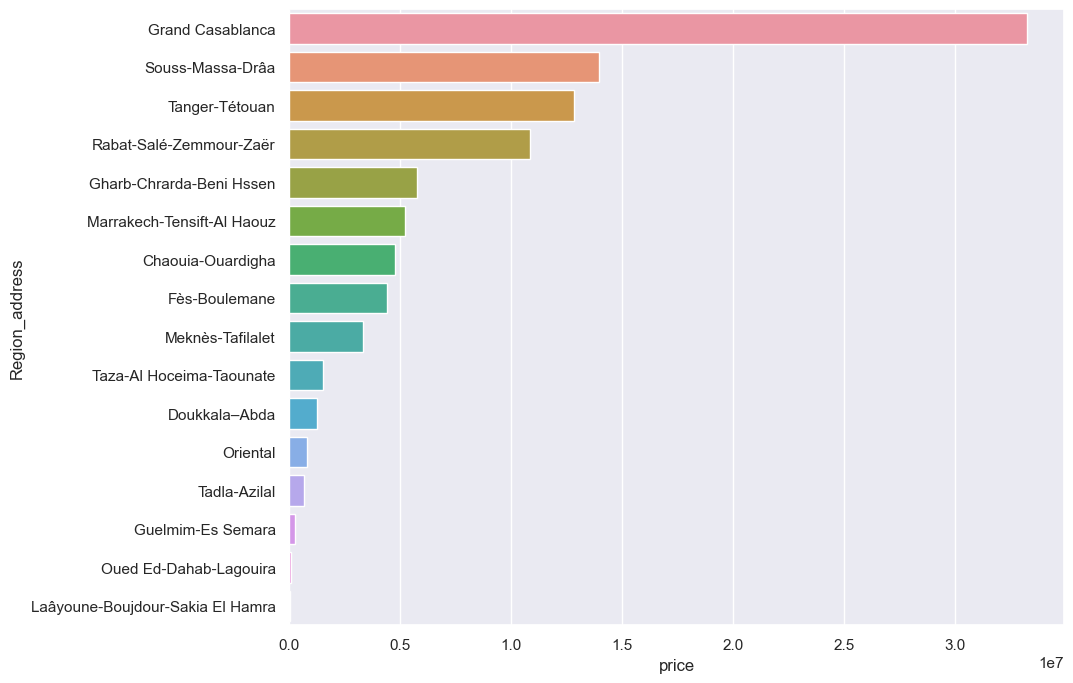

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(data=Products_data.groupby(['Region_address'])['price'].sum().reset_index().sort_values(by=['price'], ascending=False),x='price',y='Region_address')

Both the **pro** and **private** products are most sold by sellers in **Grand Casablanca**. Even the most costliest product are sold by sellers in **Grand Casablanca**. Least number of products are sold by sellers of **Laâyoune-Boujdour-Sakia El Hamra** region.